In [3]:
#batch

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats

data = pd.read_csv("/content/data.csv")
data.head()

,pressure,weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [4]:
#removing missing values
null_filter = data['pressure'].notnull()
print(data[null_filter])

    pressure  weight
0       75.1   577.8
1       74.3   577.0
2       88.7   570.9
3      114.6   578.6
4       98.5   572.4
5      112.0   411.2
6      114.8   531.7
7       62.2   563.9
8      107.0   406.7
9       90.5   507.1
10      73.8   496.4
11     115.8   505.2
12      99.4   506.4
13      93.0   510.2
14      73.9   503.9
15      65.7   506.2
16      66.2   506.3
17      77.9   510.2
18     109.8   508.6
19     105.4   510.9
20      88.6   505.4
21      89.6   512.8
22      73.8   502.8
23     101.3   493.0
24     120.0   510.8
25      75.9   512.8
26      76.2   513.4
27      81.9   510.0
28      84.3   504.3
29      98.0   522.0


In [5]:
out = np.abs(stats.zscore(data))
print(out)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


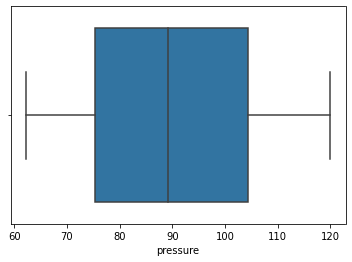

In [7]:
#outliners treatment
sns.boxplot(x=data['pressure'])

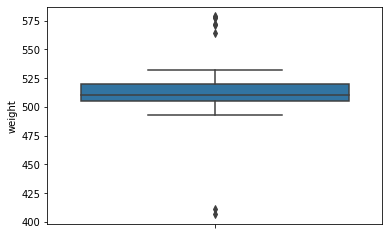

In [9]:
sns.boxplot(y=data['weight'])

In [11]:
up_data = data[(out < 3).all(axis=1)]
up_data.head()

,pressure,weight
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


In [13]:
print(len(data))
print(len(up_data))
if(len(data) == len(up_data)):
    print('No outliners')

30
30
No outliners


In [14]:
#normalization

n_data = data.copy()
n_data = (n_data - n_data.min())/(n_data.max() - n_data.min())
n_data.head()

,pressure,weight
0,0.223183,0.995346
1,0.209343,0.990692
2,0.458478,0.955207
3,0.906574,1.000000
4,0.628028,0.963933


In [16]:
train_data,test_data = train_test_split(n_data,test_size=0.1)

print(train_data.head())
print('--------------------------------------')
print(test_data.head())

    pressure    weight
22  0.200692  0.559046
25  0.237024  0.617219
16  0.069204  0.579407
3   0.906574  1.000000
0   0.223183  0.995346
--------------------------------------
    pressure    weight
26  0.242215  0.620710
12  0.643599  0.579988
8   0.775087  0.000000


In [18]:
xa = np.array(train_data['pressure'])
ya = np.array(train_data['weight'])

In [41]:
#Batch GD

from sympy import *
import pandas as pd
import random
from math import *

#step1
m0=random.randint(-9,9)
c0=random.randint(-9,9)
epoches=124
learnrate=0.001
iter=0
dm=0
dc=0


#step2

n0,m=train_data.shape
x,y,m,c,ns=symbols('x y m c ns')
e=(1/(2*ns))*((y-(m*x)-c)**2)

em=e.diff(m)
ec=e.diff(c)
print(em,ec)

#training..

for iter in range(epoches):
  for i in range(len(xa)):
    x1=xa[i]
    y1=ya[i]
    
    dm=dm+em.subs([(m,m0),(c,c0),(x,x1),(y,y1),(ns,n0)])
    dc=dc+ec.subs([(m,m0),(c,c0),(x,x1),(y,y1),(ns,n0)])
      
  cm = (-1.0)*(learnrate)*dm
  cc = (-1.0)*(learnrate)*dc

  m0 = m0+cm
  m0 = round(m0,3)
  c0 = c0+cc
  c0 = c0.round(3)
  


print('m = ',m0,', c = ',c0)



-x*(-c - m*x + y)/ns (2*c + 2*m*x - 2*y)/(2*ns)
m =  1.156 , c =  2.619


In [42]:
#RSME for traing data

tr_predicted =  m0*train_data['pressure'] + c0

from sklearn.metrics import mean_squared_error
e1 = mean_squared_error(tr_predicted, train_data['weight'])
print("RSM error is:",e1)

RSM error is: 6.5118540597231105


In [43]:
#MSE on test data

t_predicted = m0 * test_data['pressure'] + c0
e2 = mean_squared_error(t_predicted, test_data['weight'])
print("Mean Square error is:",e2)

Mean Square error is: 8.43027985694882


In [44]:
x_min = data['pressure'].min()
x_max = data['pressure'].max()
y_min = data['weight'].min()
y_max = data['weight'].max()

In [45]:
#estimated output

x = float(input("enter pressure of liquid nitrogen value :"))
x1 = x
x = (x - x_min)/(x_max - x_min)
y = m0*x + c0
y = y*(y_max - y_min) + y_min
print(f"Estimated Weight of liquid nitrogen based on its pressure {x1} is : {y}")

enter pressure of liquid nitrogen value :85.2
Estimated Weight of liquid nitrogen based on its pressure 85.2 is : 935.978444378599
